In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Transformations of Data and Exploratory Data Analysis

In this notebook we will try some methods for data transformation. Prior to transforming the data we must thoroughly explore the dataset. This process is often called **Exploratory Data Analysis**.



We will use the dataset [Melbourne Housing Snapshot](https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot) from kaggle.com. Download the data [here](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/download) and put the downloaded ZIP file `archive.zip` in the subdirectory `data` of the directory where this notebook is located. Pandas `read_csv()` function can also open a compressed CSV file.

In [37]:
data = pd.read_csv('data/archive.zip')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


The table contains information on real-estates in Melbourne, Australia. Let us look at it. 

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

At this moment, we must find out what is in the data. The following is a quote from [the original](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) description posted by the author of the dataset 

>This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D. (Central Buisiness District). 

>….Now with extra data including property size, land size and council area, you may need to change your code!

>Some Key Details
Suburb: Suburb

>Address: Address

>Rooms: Number of rooms

>Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

>Price: Price in Australian dollars

>Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

>SellerG: Real Estate Agent

>Date: Date sold

>Distance: Distance from CBD in Kilometres

Postcode> self explanatory

>Bedroom2 : Scraped # of Bedrooms (from different source)

>Bathroom: Number of Bathrooms

>Car: Number of carspots

>Landsize: Land Size in Metres

>BuildingArea: Building Size in Metres

>YearBuilt: Year the house was built

>CouncilArea: Governing council for the area

>Lattitude: Self explanitory

>Longtitude: Self explanitory

>Regionname: General Region (West, North West, North, North east …etc)

>Propertycount: Number of properties that exist in the suburb.

Let us display more samples from the dataset.


In [39]:
pd.set_option('display.max_columns',100)  # for showing more columns, in deepnote.com not necessary
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,4.0,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [40]:
data.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1504,Bulleen,13 Hillside Rd,2,h,1060000.0,S,Jellis,28/05/2016,11.8,3105.0,2.0,1.0,2.0,609.0,NaN,NaN,Manningham,-37.77620,145.09580,Eastern Metropolitan,4480.0
3220,Hawthorn,13/44 Burwood Rd,2,u,627500.0,S,Jellis,28/08/2016,4.6,3122.0,2.0,2.0,2.0,0.0,89.0,2000.0,Boroondara,-37.82130,145.02240,Southern Metropolitan,11308.0
10347,Hoppers Crossing,8 Hayden St,3,h,492000.0,S,YPA,27/05/2017,18.4,3029.0,3.0,1.0,1.0,581.0,NaN,NaN,Wyndham,-37.87711,144.68825,Western Metropolitan,13830.0
5652,South Yarra,9/18 Kensington Rd,2,u,693000.0,S,Biggin,15/10/2016,3.3,3141.0,2.0,1.0,1.0,2122.0,64.0,1960.0,Stonnington,-37.83830,145.00140,Southern Metropolitan,14887.0
3194,Hawthorn,13/506 Glenferrie Rd,1,u,290000.0,S,Biggin,22/05/2016,4.6,3122.0,1.0,1.0,1.0,1568.0,NaN,NaN,Boroondara,-37.83080,145.03400,Southern Metropolitan,11308.0


### Numeric features

Plot histogram of all numeric features.

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>,
        <Axes: title={'center': 'Longtitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

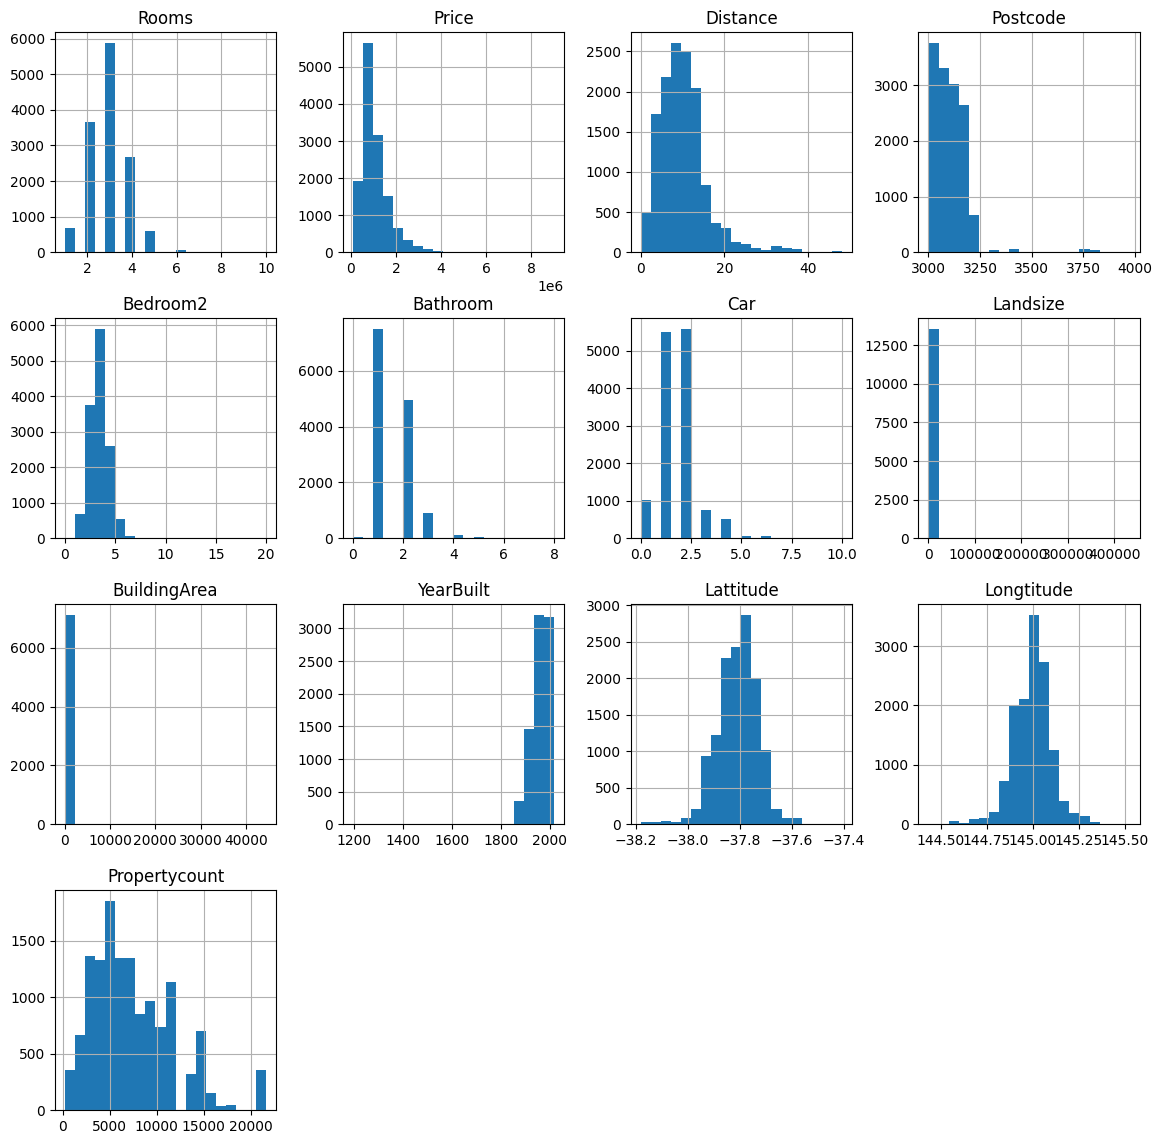

In [41]:
data.hist(bins=20,figsize=(14,14))

Inspect the histograms:
* Do we need more detailed histograms?
* Are there any outliers?
* Should any of the numeric features be categorical? When should a feature be categorical?
* Do the features satisfy the natural boundaries? E.g., the percentage is not higher than 100%.

If you suspect that there are any outliers, inspect the respective feature:
* What are the outliers?
* How many outliers can you identify for a given feature?

For identifying the outliers, you can also use the `describe()` method of  `pandas` `DataFrame`.


In [42]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [43]:
# YOUR CODE HERE
def get_outliers(dataFrame : pd.DataFrame, col_name : str):
    column = dataFrame[col_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    
    iqr= q3-q1
    threshold_above = q3 + iqr*1.5
    threshold_below = q1 - iqr*1.5

    return dataFrame[(dataFrame[col_name]>threshold_above) | (dataFrame[col_name]<threshold_below)]
    
get_outliers(data,"Price")       

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
80,Albert Park,112 Beaconsfield Pde,3,h,2850000.0,PI,Buxton,4/03/2017,3.3,3206.0,3.0,2.0,0.0,211.0,198.0,1890.0,Port Phillip,-37.84810,144.94990,Southern Metropolitan,3280.0
92,Albert Park,2 Dundas Pl,3,h,2615000.0,S,Cayzer,10/12/2016,3.3,3206.0,3.0,2.0,1.0,177.0,181.0,1880.0,Port Phillip,-37.84150,144.95850,Southern Metropolitan,3280.0
97,Albert Park,70 Barrett St,3,h,2575000.0,S,Greg,15/10/2016,3.3,3206.0,3.0,2.0,1.0,228.0,NaN,NaN,Port Phillip,-37.84450,144.95010,Southern Metropolitan,3280.0
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,18/03/2017,3.3,3206.0,3.0,2.0,0.0,147.0,146.0,1890.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0
103,Albert Park,55 Withers St,4,h,2800000.0,VB,Cayzer,18/06/2016,3.3,3206.0,4.0,3.0,1.0,327.0,254.0,1910.0,Port Phillip,-37.84670,144.94750,Southern Metropolitan,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13521,Port Melbourne,44 Garton St,4,t,2455000.0,SP,Marshall,26/08/2017,3.5,3207.0,4.0,3.0,2.0,123.0,0.0,2010.0,NaN,-37.83349,144.94840,Southern Metropolitan,8648.0
13523,Prahran,69 Greville St,4,h,2668000.0,S,Biggin,26/08/2017,4.6,3181.0,4.0,2.0,2.0,383.0,NaN,NaN,NaN,-37.84879,144.98882,Southern Metropolitan,7717.0
13553,Surrey Hills,20 Albert Cr,4,h,2720000.0,S,Kay,26/08/2017,10.2,3127.0,4.0,3.0,2.0,1005.0,NaN,1920.0,NaN,-37.82421,145.10352,Southern Metropolitan,5457.0
13555,Surrey Hills,3 Oak St,4,h,3100000.0,VB,Marshall,26/08/2017,10.2,3127.0,4.0,2.0,3.0,832.0,NaN,NaN,NaN,-37.83564,145.10919,Southern Metropolitan,5457.0


YOUR ANSWER HERE

Note, e.g., that 
* `Price` is skewed.
* Several attributes have missing data; which ones?


### Categorical features

How can we identify categorical features in the output of `data.info`?

Also, we can use `describe()` for categorical features. 

In [44]:
data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


We can plot histograms for the categorical features. Try, e.g., `Suburb`.



<Axes: xlabel='Suburb'>

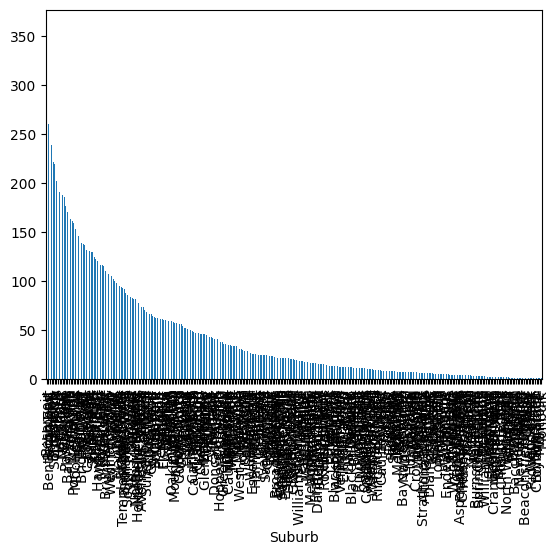

In [45]:
# YOUR CODE HERE
data["Suburb"].value_counts().plot(kind="bar")

<Axes: xlabel='count', ylabel='Type'>

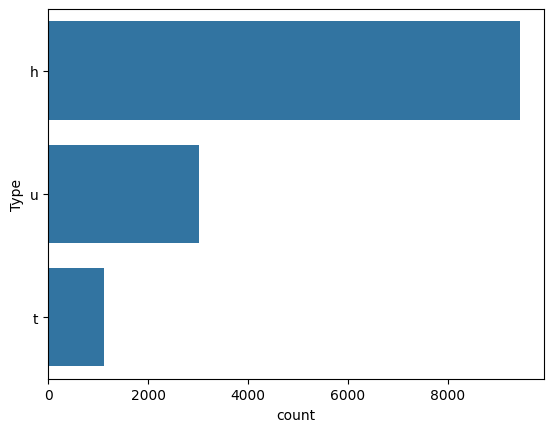

In [46]:
sns.countplot(y='Type', data=data)

In [47]:
#fig, ax = plt.subplots(figsize=(5, 100))
#sns.countplot(y='Suburb', data=data, order = data['Suburb'].value_counts().index)

Several categorical features have many different values. Which ones?

Plot the histograms for all categorical features with at most ten different classes.

In [48]:
# Create a list few_classes_columns of categorical attributes with at most 10 classes

description=data.describe(include = "object")
few_classes_columns=description.columns[description.loc["unique"]<=10]
# At first compute the list of columns with categorical data with at most 10 different classes.
# YOUR CODE HERE

print(few_classes_columns)

Index(['Type', 'Method', 'Regionname'], dtype='object')


Plot histograms for all features from `few_classes_columns`.

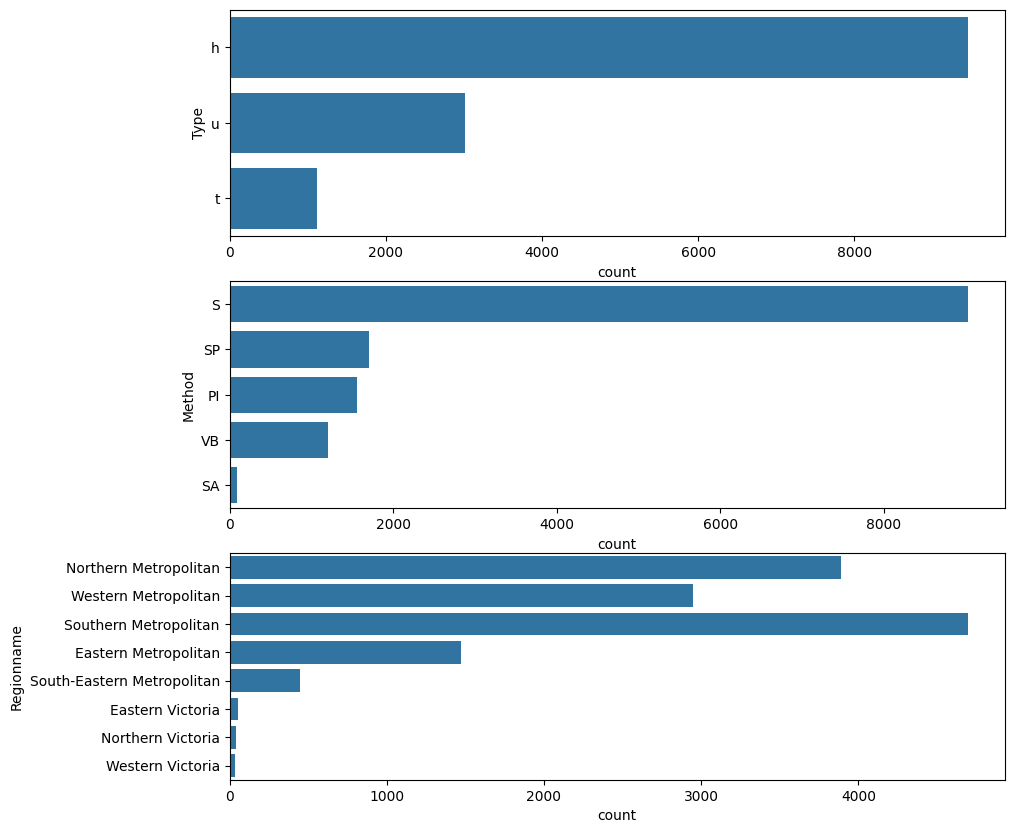

In [49]:
# YOUR CODE HERE
num_figs = len(few_classes_columns)
fig, axs = plt.subplots(num_figs,1,figsize=(10,10))
for c,col in enumerate(few_classes_columns):
    sns.countplot(ax=axs[c],data=data,y=col)

The histogram for `Regionname` is not readable. A histogram with horizontal bars would be better. Plot it!

<Axes: xlabel='count', ylabel='Regionname'>

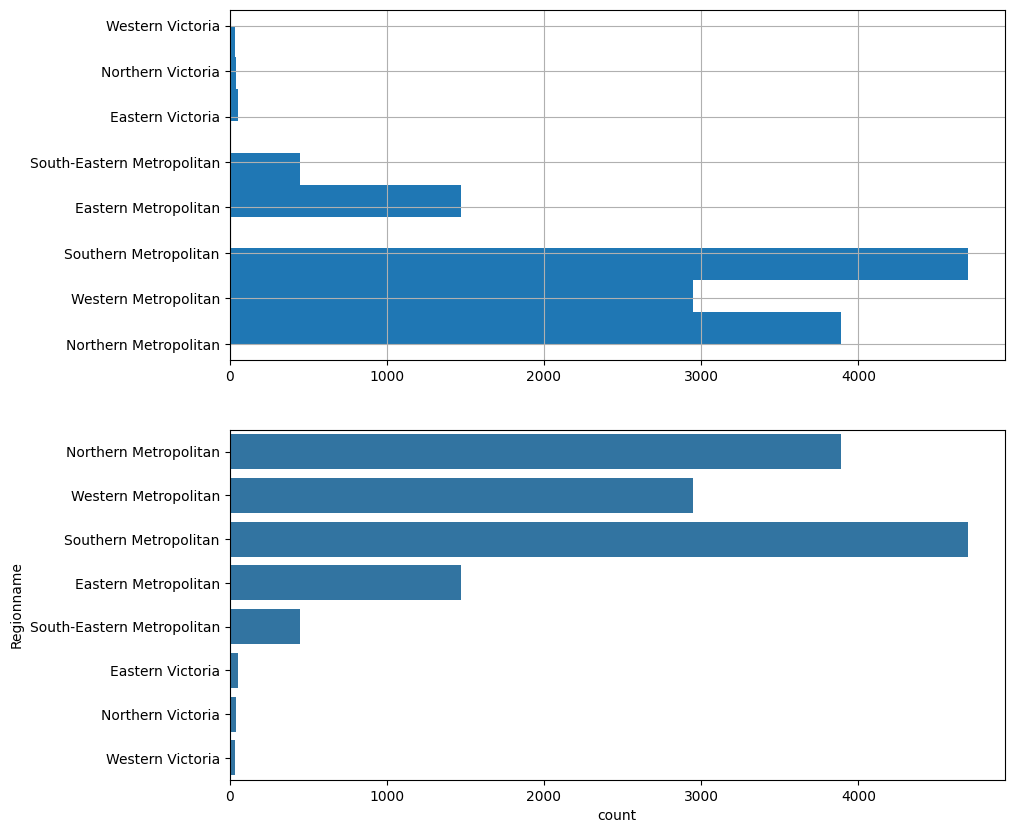

In [50]:
fig,axs=plt.subplots(2,1,figsize=(10,10))

# try it with .hist(orientation='horizontal')
# YOUR CODE HERE
data["Regionname"].hist(ax=axs[0],orientation='horizontal')

# compare to sns.countplot(y='Type', data=data)
# YOUR CODE HERE
sns.countplot(ax=axs[1],y='Regionname', data=data)

Having the histograms for categorical features, we can inspect them:

* Are there sparse classes? They could affect a model’s performance.
* Are there errors in the class names? E.g., classes with typos in their names.

Note that `Regionname` has three sparse classes that might need to be merged or re-assigned during modeling.

 

## Grouping and segmentation

Segmentation allows us to cut the data and observe the relationship between categorical and numeric features.

 
### Segment the target feature by categorical features.

Here, we will compare the target feature `Price` and our main categorical features (`Type`, `Method`, and `Regionname`) to see whether or not `Price` depends on the classes.

We can use the boxplot of `Price` by the classes of categorical features. For boxplot description, see the [tutorial](https://www.geeksforgeeks.org/how-to-show-mean-on-boxplot-using-seaborn-in-python/), where you can find the following diagram

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20201109141359/BVoxplot.jpg" width=800>

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


<Axes: title={'center': 'Price'}, xlabel='Type'>

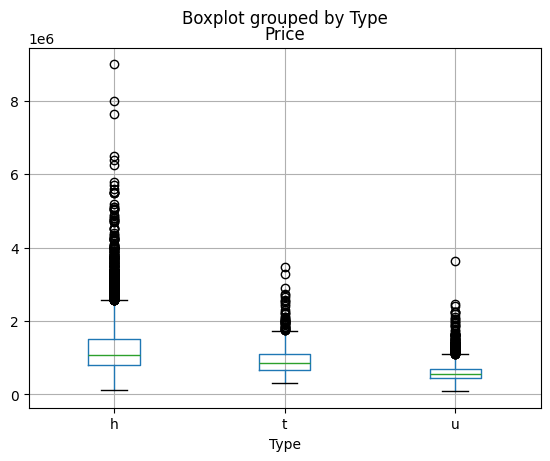

In [51]:
print(data.columns)
data.boxplot(column=['Price'], by='Type')

<Axes: title={'center': 'Price'}, xlabel='[Regionname]'>

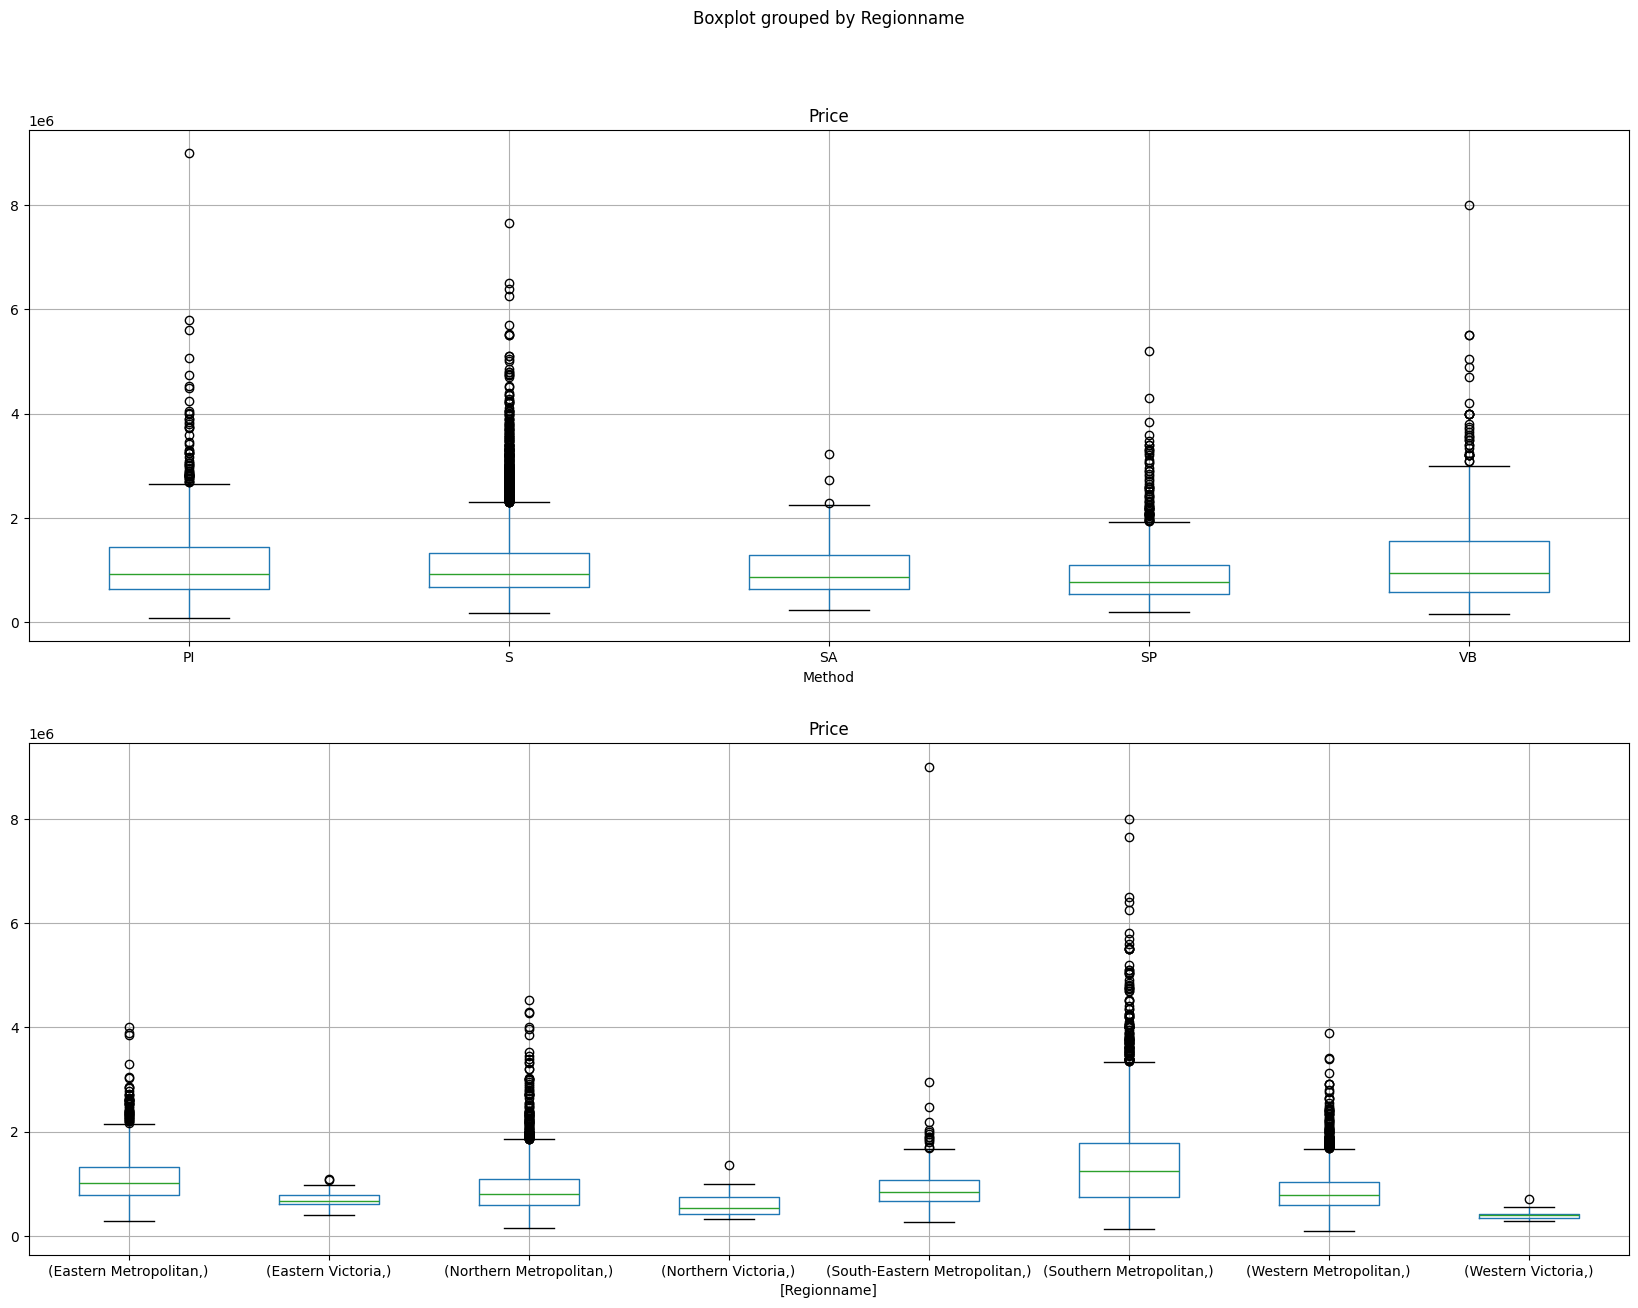

In [52]:
fig,axs = plt.subplots(2,1,figsize=(20,15))
# Boxplots for Price by Method
# YOUR CODE HERE
data.boxplot(column=["Price"],by="Method",ax=axs[0])

# boxplots for Price by Regionname
# YOUR CODE HERE
data.boxplot(column=["Price"],by=["Regionname"],ax=axs[1])

* Which classes most affect the target variable?

Note how `Price` is still sparsely distributed among the 3 sparse classes of `Regionname`, strengthening our case against these classes.

Those attributes affect the Price the most that have a ot of outliers, because it means that for example houses of that certain type or in that certain region are valued more. Also the ones with most of the outliers are have a larger interquartile range.

Also note how the SA class (the least frequent Method class) commands high prices, almost similar prices of the most frequently occurring class S.

<Axes: title={'center': 'Price'}, xlabel='[Type, Method]'>

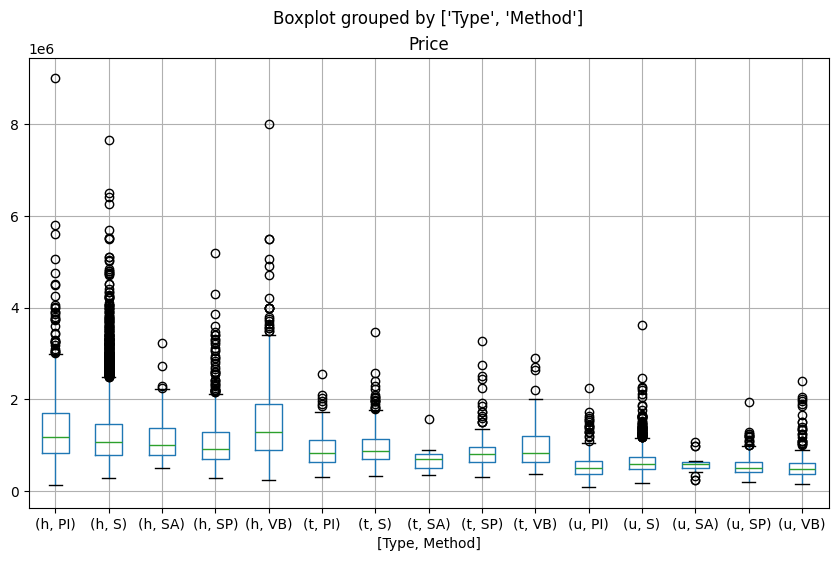

In [53]:
data.boxplot(column=['Price'], by=['Type','Method'],figsize=(10,6))

### Grouping numeric features by each categorical feature

By summarizing the numeric features across the classes, we would like to see how the remaining numeric features change with each categorical feature. We have many numeric features; therefore, we do not produce many plots. We use the `Dataframe.groupby()` method to group the data by a category and calculate a metric (such as mean, median, min, std, etc.) across the various numeric features.

We group the data for only the features from `few_classes_columns`, then calculate the count of records for a given attribute with respect to the classes of a selected categorical feature. Compare the counts of `Suburb` and `BuildingArea` with respect to the classes of `Type`. 

In [54]:
data.groupby('Type').count()["Suburb"]

Type
h    9449
t    1114
u    3017
Name: Suburb, dtype: int64

In [55]:
# similarly for BuildingArea
# YOUR CODE HERE
data.groupby('Type').count()['BuildingArea']

Type
h    4860
t     686
u    1584
Name: BuildingArea, dtype: int64

Compute *mean* across the numeric features with respect to the classes of `Type`.  Similarly, we can compute median, minimum, maximum, etc.

In [56]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [57]:
data.describe().columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [58]:
# YOUR CODE HERE
columns=data.describe().columns
data.groupby("Type").count()[columns]

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,9449,9449,9449,9449,9449,9449,9389,9449,4860,5408,9449,9449,9449
t,1114,1114,1114,1114,1114,1114,1114,1114,686,762,1114,1114,1114
u,3017,3017,3017,3017,3017,3017,3015,3017,1584,2035,3017,3017,3017


In [59]:
data.groupby("Type")[columns].median()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,3.0,1080000.0,10.4,3081.0,3.0,1.0,2.0,560.0,144.0,1960.0,-37.793570,145.00189,6380.0
t,3.0,846750.0,9.9,3084.0,3.0,2.0,2.0,198.5,130.0,2005.0,-37.802695,145.00350,6244.0
u,2.0,560000.0,6.9,3122.0,2.0,1.0,1.0,0.0,75.0,1975.0,-37.825860,144.99722,7485.0


In [60]:
data.groupby("Type")[columns].max()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Type,,,,,,,,,,,,,
h,10,9000000.0,48.1,3977.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.40853,145.52635,21650.0
t,5,3475000.0,35.4,3752.0,5.0,4.0,4.0,15900.0,3558.0,2017.0,-37.57243,145.29371,21650.0
u,8,3625000.0,41.0,3910.0,5.0,4.0,7.0,37000.0,1561.0,2017.0,-37.57063,145.36939,21650.0


## Relationships between numeric features

We can compute correlation between all pairs of numeric features - correlation matrix.

In [61]:
corr = data.drop(columns=['Suburb','Address','Type','Method','SellerG','Date','CouncilArea','Regionname']).corr()
corr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


It is hard to spot any patterns in such a big table. It is easier with a heatmap.

<Axes: >

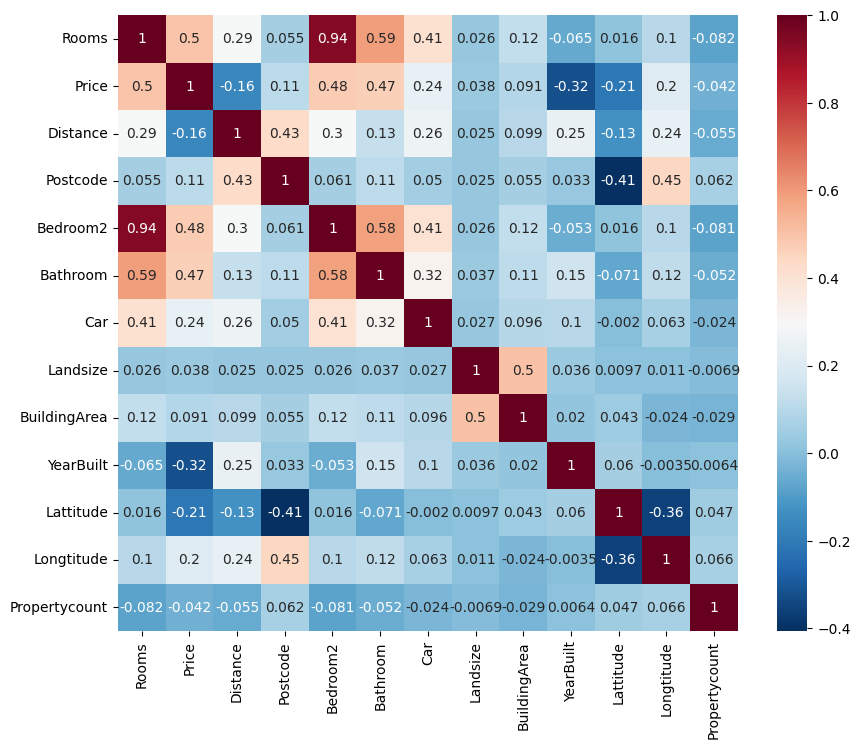

In [62]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='RdBu_r',annot=True)

# Futher statistical analysis

Find attributes that are most correlated with the `Price`. Illustrate the correlation with plots.


In [63]:
# your code goes here
print(corr["Price"].sort_values(ascending=False))
print(corr["Price"].sort_values(ascending=False,key=lambda col: col.abs()))


Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
Car              0.238979
Longtitude       0.203656
Postcode         0.107867
BuildingArea     0.090981
Landsize         0.037507
Propertycount   -0.042153
Distance        -0.162522
Lattitude       -0.212934
YearBuilt       -0.323617
Name: Price, dtype: float64
Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt       -0.323617
Car              0.238979
Lattitude       -0.212934
Longtitude       0.203656
Distance        -0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount   -0.042153
Landsize         0.037507
Name: Price, dtype: float64


In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# input and output features
X = data.drop("Price", axis= 1)
y = data["Price"]

# defining model to build
lin_reg = LinearRegression()

# create the RFE model and select 6 attributes
rfe = RFE(estimator=lin_reg, n_features_to_select=6)
rfe.fit(X, y)

# summarize the selection of the attributes
print(f"Number of selected features: {rfe.n_features_}\n\
Mask: {rfe.support_}\n\
Selected Features:", [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1],"\n\
Estimator : {rfe.estimator_}")


ValueError: could not convert string to float: 'Abbotsford'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67f1cf2b-c97a-47ed-8e26-a1e69c13c9c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>